In [125]:
!pip install ndlib

#Exercise 1 – Simulation of epidemic models

In [126]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.opinions as op
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
plt.ion()

In [127]:
import warnings
warnings.filterwarnings("ignore")

##### Create a random graph

In [128]:
g = nx.erdos_renyi_graph(1000, 0.1)

In [129]:
models = {
    'SI': ep.SIModel(g),
    'SIS': ep.SISModel(g),
    'SEIS': ep.SEISModel(g),
    'SEIR': ep.SEIRModel(g)
}

for model_name, model_ins in models.items():
    print(f"Model: {model_name}")
    print(f"Model parameters: {model_ins.parameters}")
    print(f"Available Statuses: {model_ins.available_statuses}\n")

Model: SI
Model parameters: {'model': {'beta': {'descr': 'Infection rate', 'range': '[0,1]', 'optional': False}, 'tp_rate': {'descr': 'Whether if the infection rate depends on the number of infected neighbors', 'range': [0, 1], 'optional': True, 'default': 1}}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}

Model: SIS
Model parameters: {'model': {'beta': {'descr': 'Infection rate', 'range': [0, 1], 'optional': False}, 'lambda': {'descr': 'Recovery rate', 'range': [0, 1], 'optional': False}, 'tp_rate': {'descr': 'Whether if the infection rate depends on the number of infected neighbors', 'range': [0, 1], 'optional': True, 'default': 1}}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}

Model: SEIS
Model parameters: {'model': {'alpha': {'descr': 'Incubation period', 'range': [0, 1], 'optional': False}, 'beta': {'descr': 'Infection rate', 'range': [0, 1], 'optional': False}, 'lambda': {'descr': 'Recovery rate', 'range': [0,

#####Define parameters for each model

In [130]:
parameters = {
    'SI': {'beta': 0.001, 'fraction_infected': 0.05},
    'SIS': {'beta': 0.001, 'lambda': 0.01, 'fraction_infected': 0.05},
    'SEIS': {'beta': 0.001, 'lambda': 0.01, 'alpha': 0.005, 'fraction_infected': 0.05},
    'SEIR': {'beta': 0.001, 'gamma': 0.01, 'alpha': 0.005, 'fraction_infected': 0.05}
}

In [131]:
def visualize_diffusion_trend(model_name, model, parameters, image_names=None):

    image_names = []

    config = mc.Configuration()
    params = parameters[model_name]
    for param, value in params.items():
        config.add_model_parameter(param, value)
    model.set_initial_status(config)
    iterations = model.iteration_bunch(200)
    trends = model.build_trends(iterations)

    image_name = f"diffusion_{model_name}.jpg"
    image_names.append(image_name)
    print(f"{model_name} simulation done.")

    viz = DiffusionTrend(model, trends)
    viz.plot(image_name)

    if all(iterations[-1]['node_count'][status] == iterations[-2]['node_count'][status] for status in iterations[-1]['node_count']):
      print(f"{model_name} reached equilibrium.")
    else:
      print(f"{model_name} has not reached equilibrium.")

    return image_names


In [132]:
image_names_dict = {model_name: [] for model_name in models}

for model_name, model_ins in models.items():
    image_names_dict[model_name] = visualize_diffusion_trend(model_name, model_ins, parameters, image_names_dict[model_name])

SI simulation done.
SI reached equilibrium.
SIS simulation done.
SIS has not reached equilibrium.
SEIS simulation done.
SEIS has not reached equilibrium.
SEIR simulation done.
SEIR has not reached equilibrium.


Model: SI


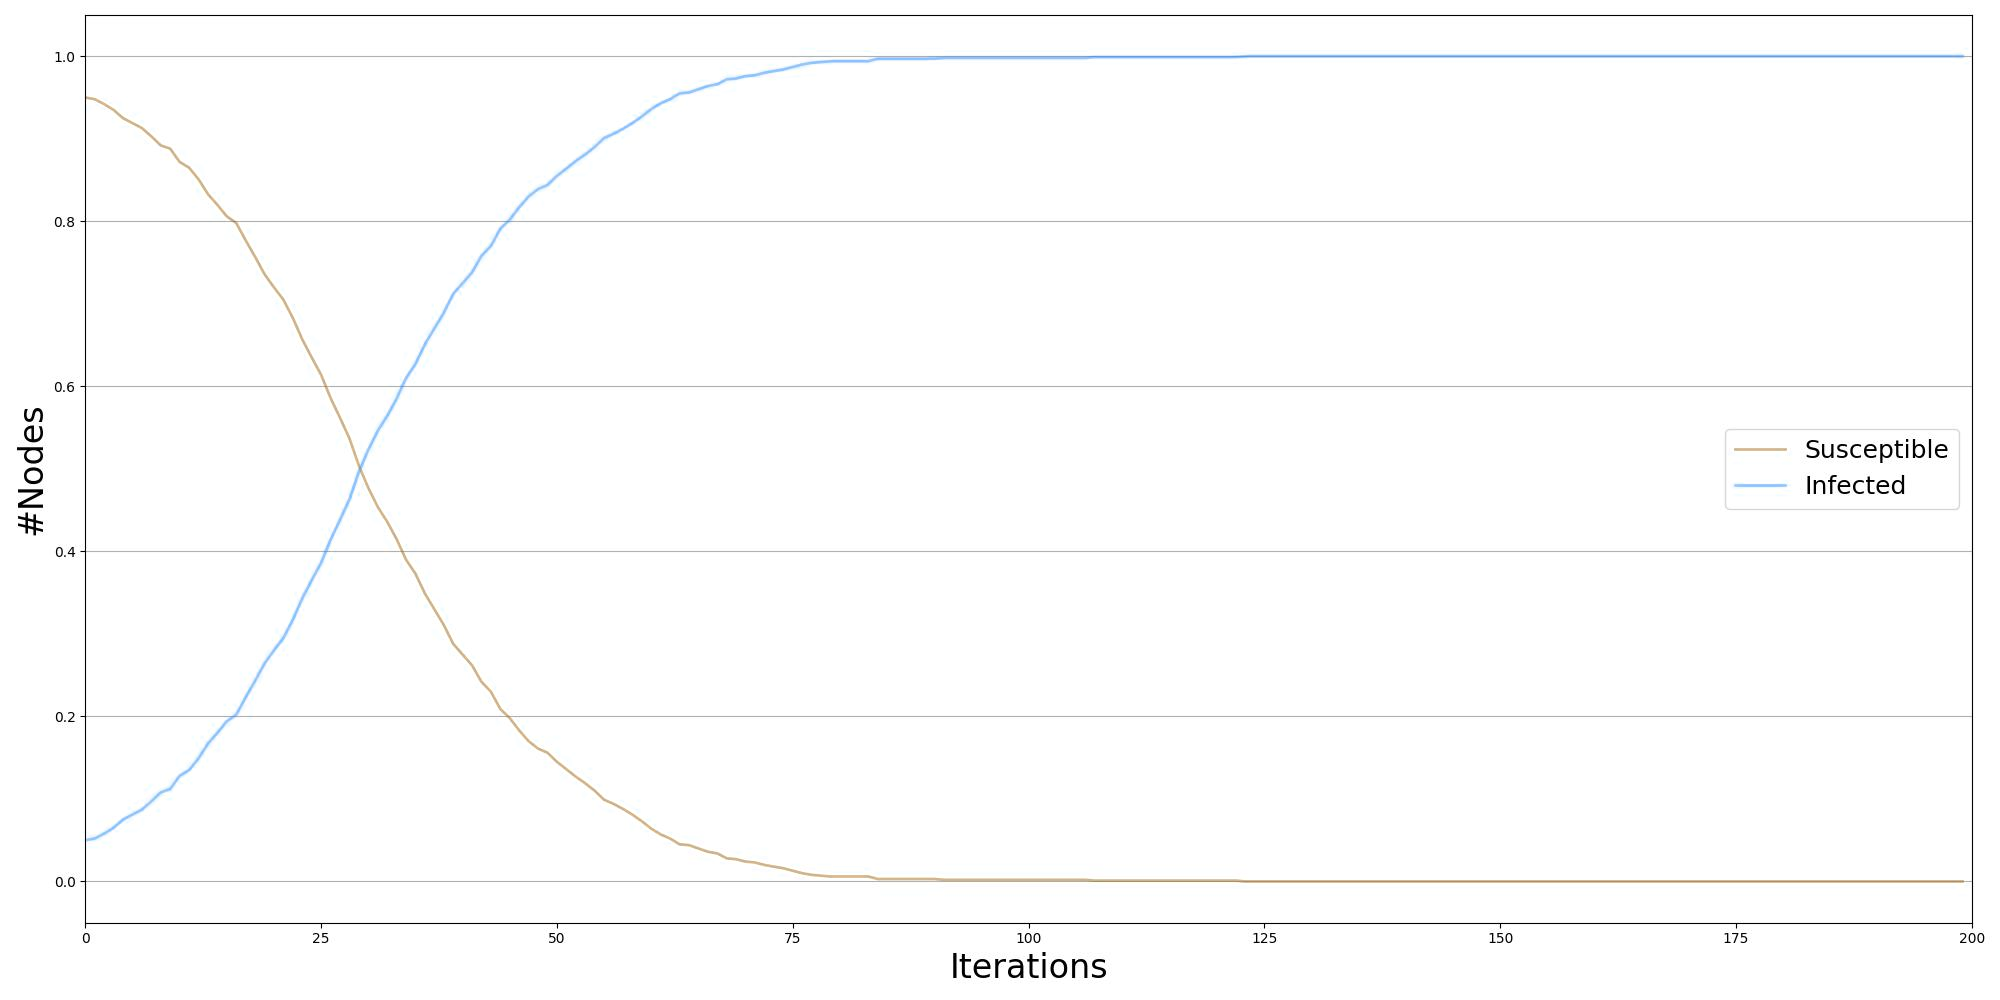

Model: SIS


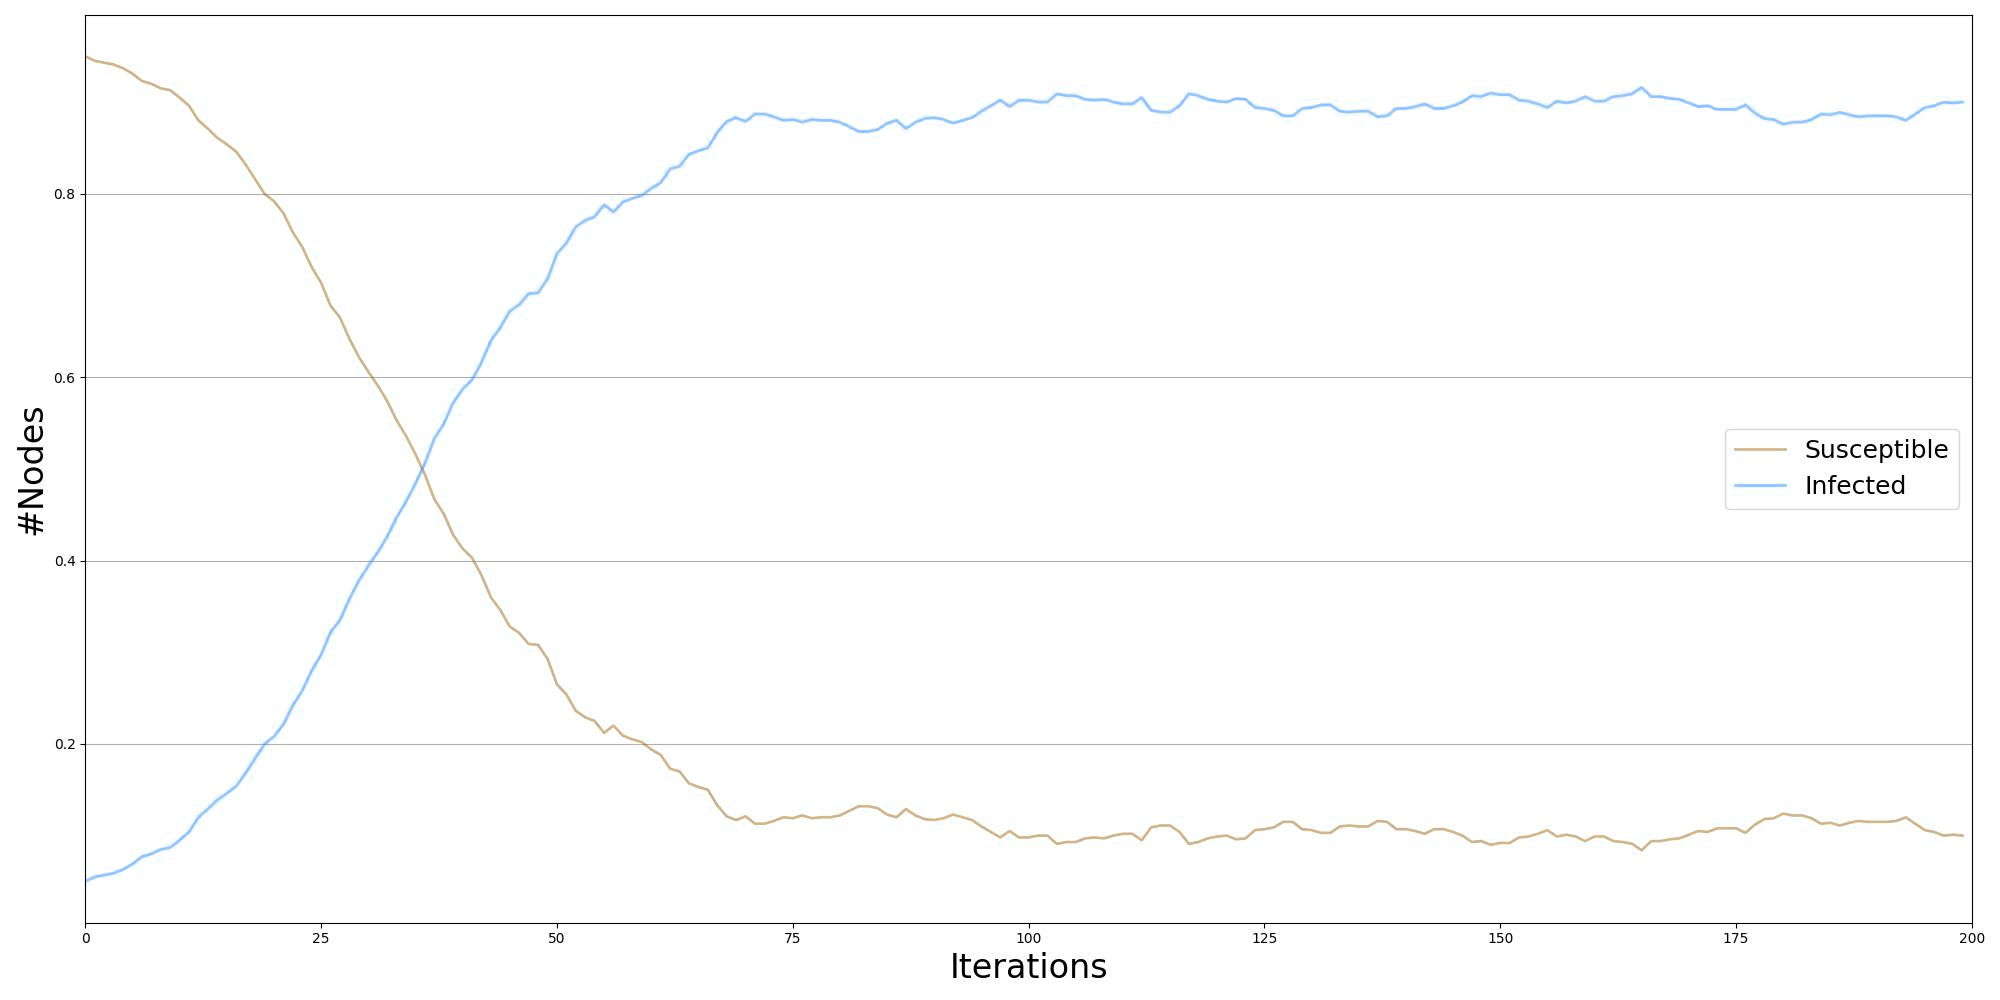

Model: SEIS


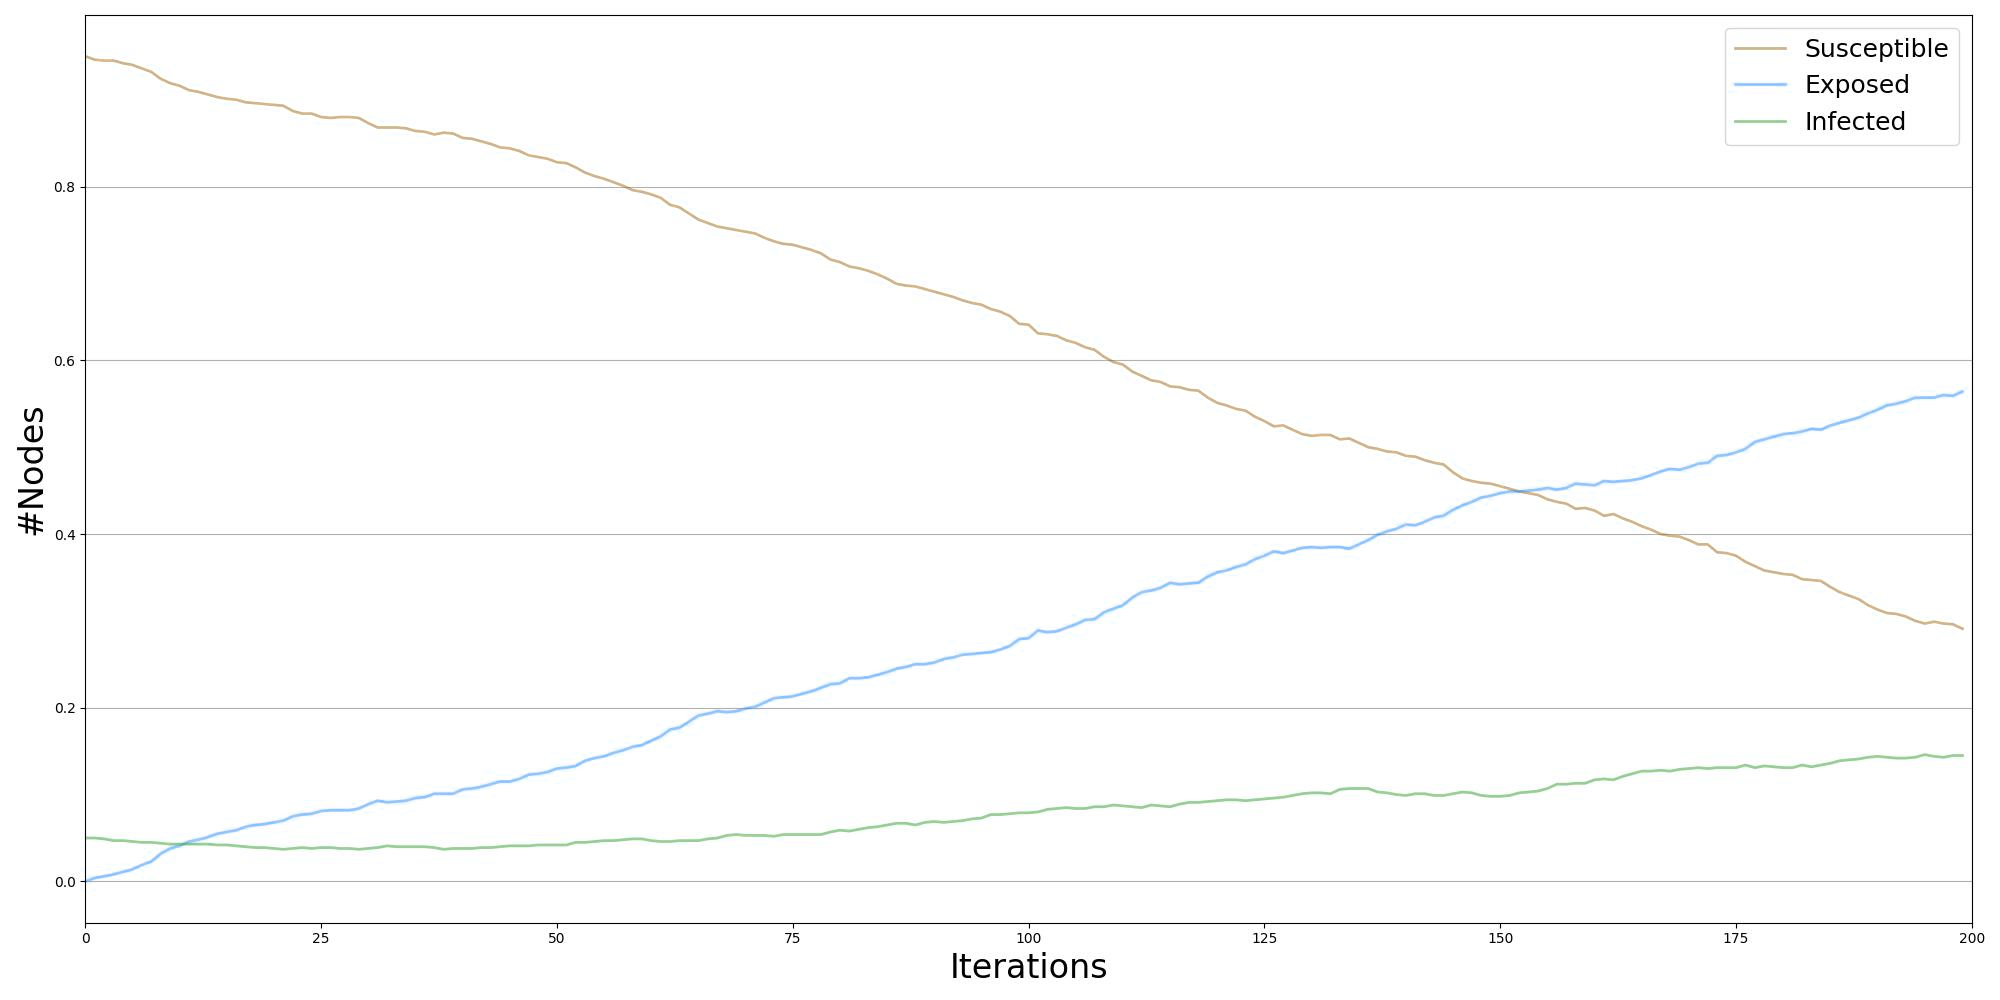

Model: SEIR


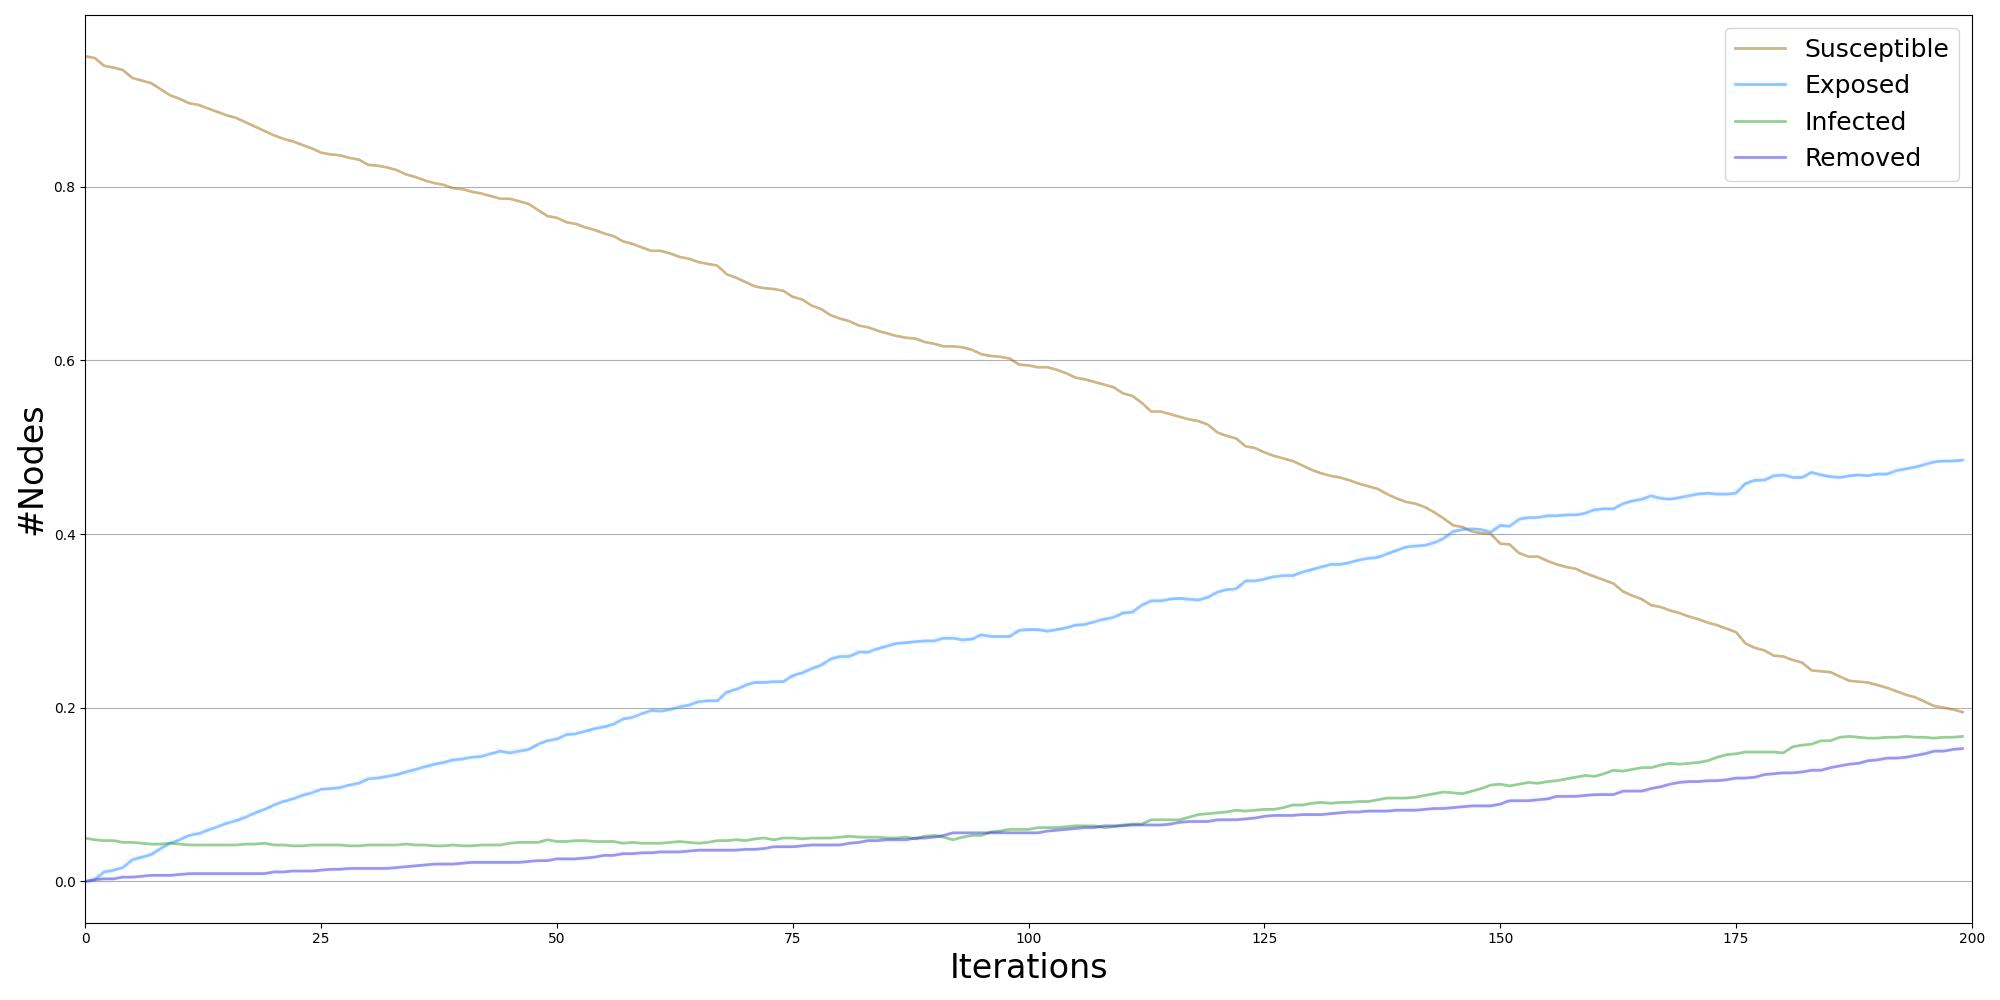

In [133]:
import cv2
from google.colab.patches import cv2_imshow

for model_name, image_names in image_names_dict.items():
    print(f"Model: {model_name}")
    for image_name in image_names:
        img = plt.imread(image_name)
        cv2_imshow(img)

#Exercise 2 – Simulation of opinion diffusion models with random graph

In [134]:
g = nx.erdos_renyi_graph(1000, 0.1)

In [135]:
models = {
    'Voter': op.VoterModel(g),
    'QVoter': op.QVoterModel(g),
    'MajorityRuleModel': op.MajorityRuleModel(g),
    'Sznajd': op.SznajdModel(g)
}

for model_name, model_ins in models.items():
    print(f"Model: {model_name}")
    print(f"Model parameters: {model_ins.parameters}")
    print(f"Available Statuses: {model_ins.available_statuses}\n")

Model: Voter
Model parameters: {'model': {}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}

Model: QVoter
Model parameters: {'model': {'q': {'descr': 'Number of neighbours that affect the opinion of an agent', 'range': [0, 1000], 'optional': False}}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}

Model: MajorityRuleModel
Model parameters: {'model': {'q': {'descr': 'Number of randomly chosen voters', 'range': [0, 1000], 'optional': False}}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}

Model: Sznajd
Model parameters: {'model': {}, 'nodes': {}, 'edges': {}}
Available Statuses: {'Susceptible': 0, 'Infected': 1}



In [136]:
def visualize_opinion_diffusion_trend(model_name, model):
    image_names = []
    config = mc.Configuration()

    config.add_model_parameter('q', 2)

    model.set_initial_status(config)

    iterations = model.iteration_bunch(200)
    trends = model.build_trends(iterations)

    print(f"{model_name} simulation done.")
    image_name = f"diffusion_{model_name}.jpg"
    image_names.append(image_name)

    viz = DiffusionTrend(model, trends)
    viz.plot(image_name)

    if all(iterations[-1]['node_count'][status] == iterations[-2]['node_count'][status] for status in iterations[-1]['node_count']):
      print(f"{model_name} reached equilibrium.")
    else:
      print(f"{model_name} has not reached equilibrium.")

    return image_names

In [137]:
image_names_dict = {model_name: [] for model_name in models}

for model_name, model in models.items():
    image_names_dict[model_name] = visualize_opinion_diffusion_trend(model_name, model)

Voter simulation done.
Voter has not reached equilibrium.
QVoter simulation done.
QVoter reached equilibrium.
MajorityRuleModel simulation done.
MajorityRuleModel reached equilibrium.
Sznajd simulation done.
Sznajd reached equilibrium.


Model: Voter


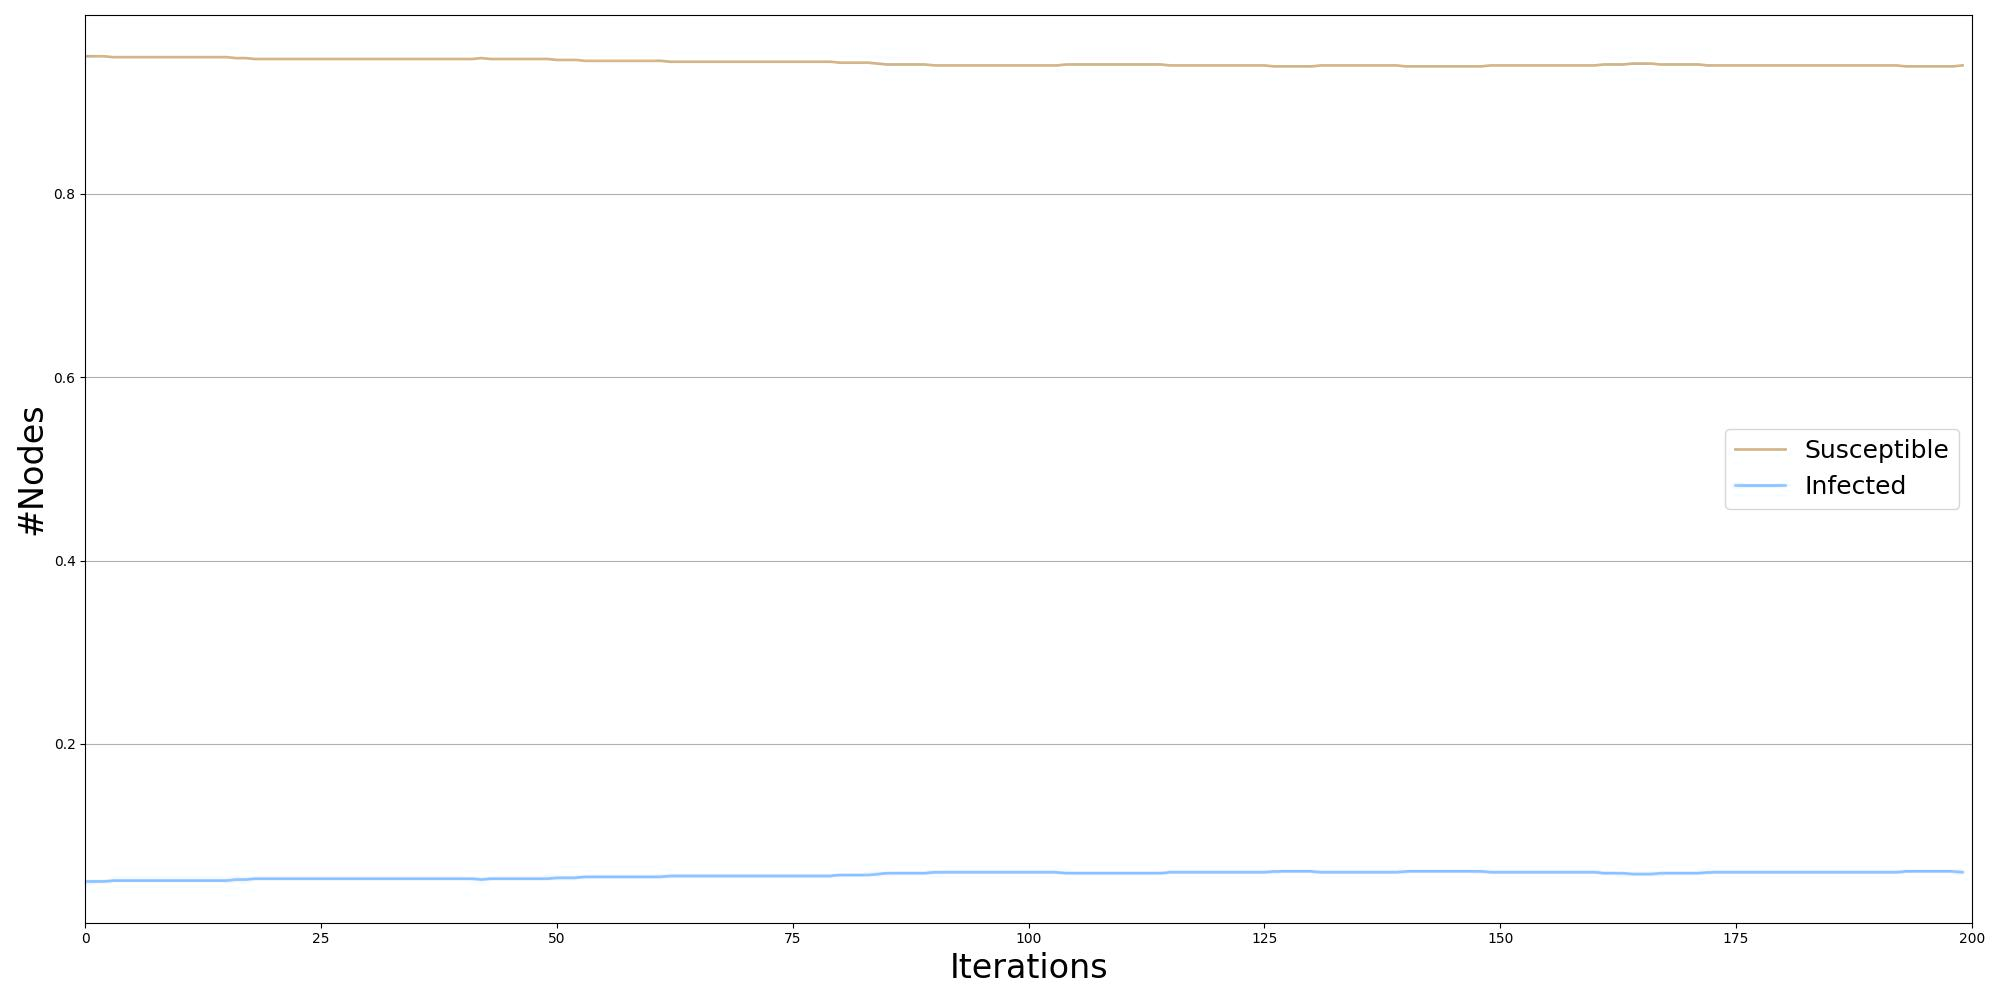

Model: QVoter


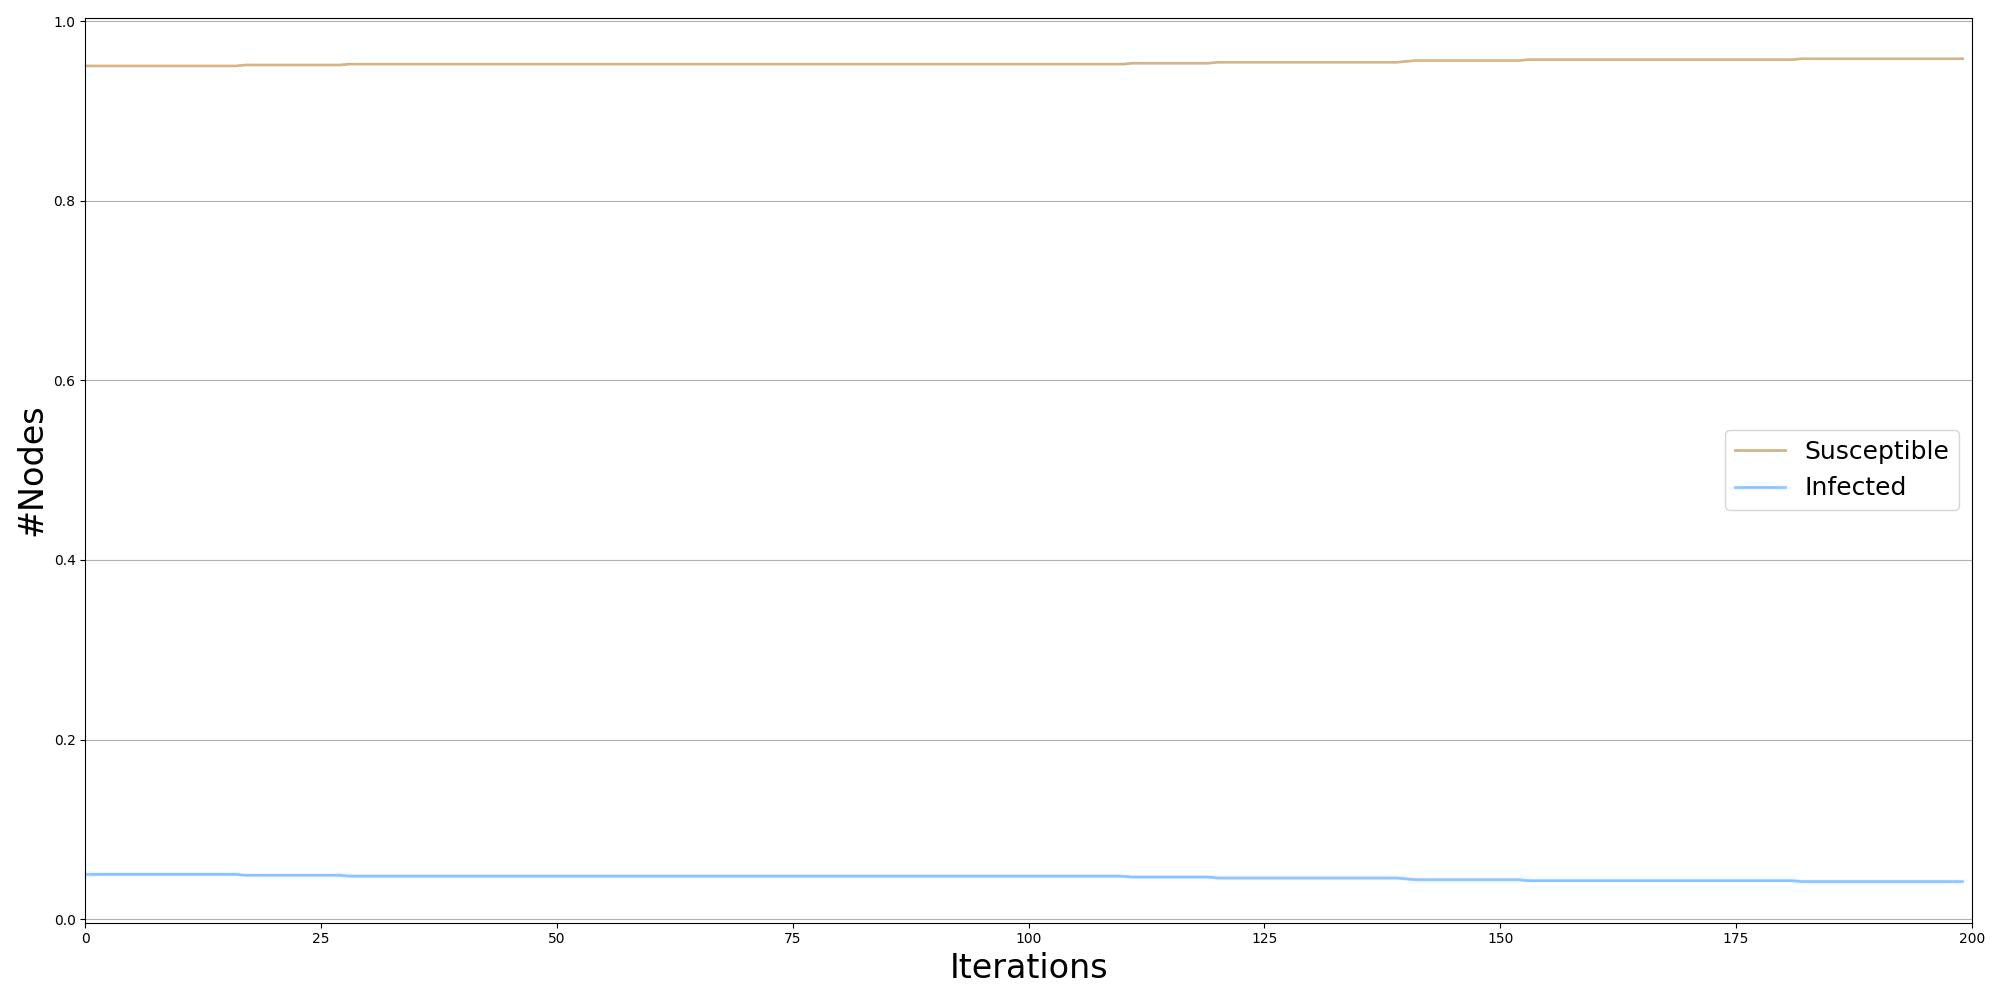

Model: MajorityRuleModel


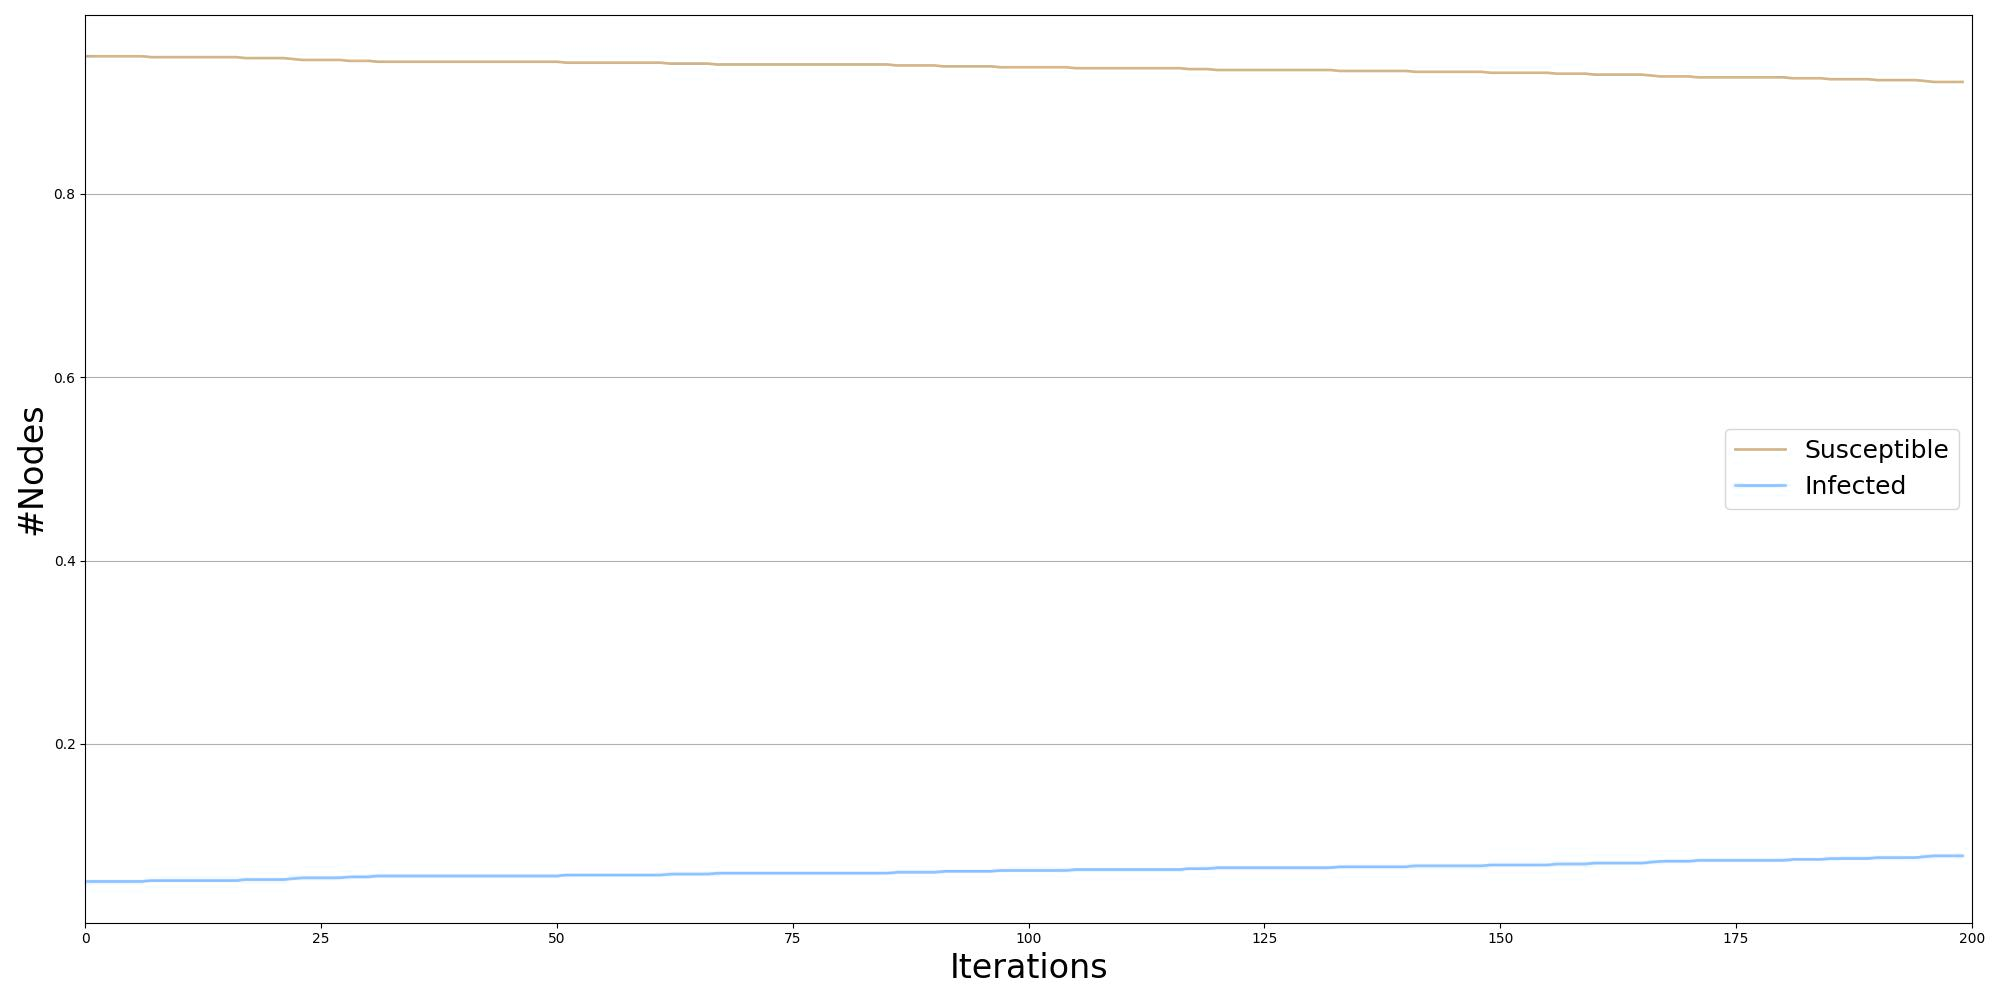

Model: Sznajd


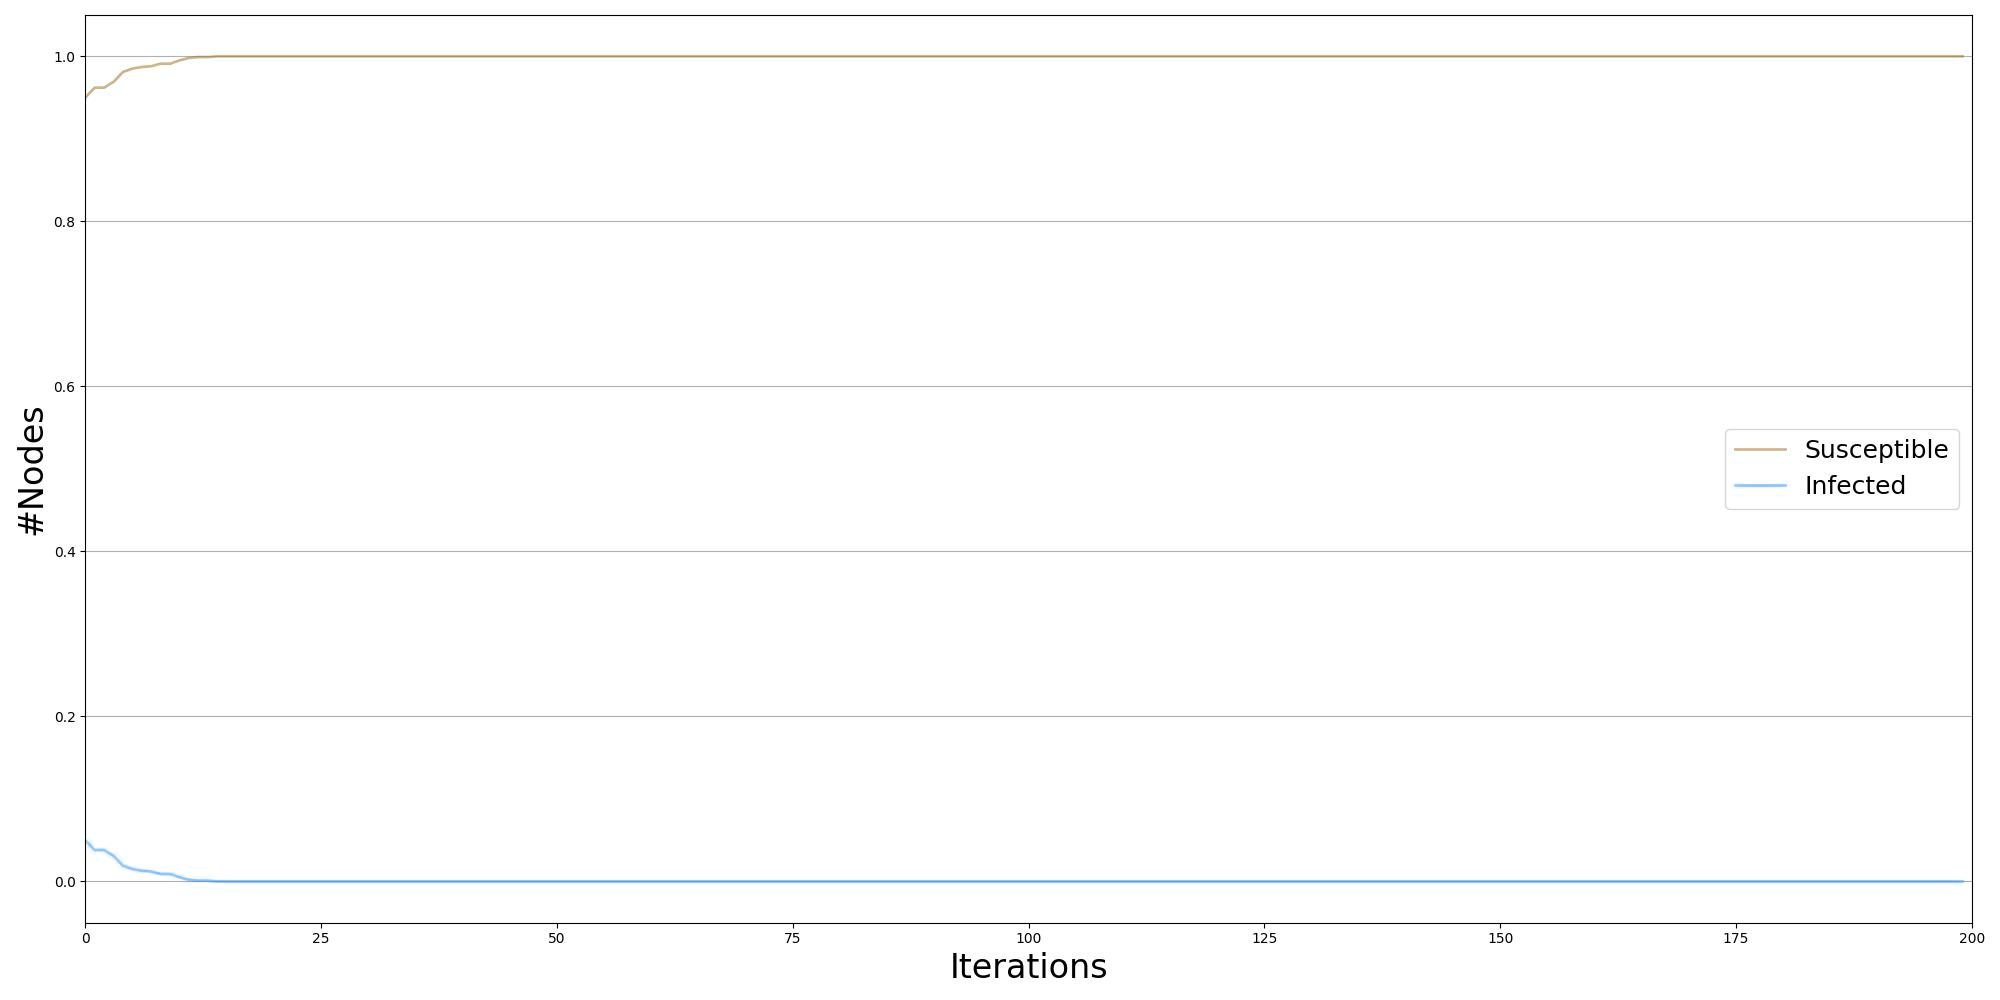

In [138]:
for model_name, image_names in image_names_dict.items():
    print(f"Model: {model_name}")
    for image_name in image_names:
        img = plt.imread(image_name)
        cv2_imshow(img)

#Exercise 3 - Simulation of Opinion Diffusion Models in social networks

In [151]:
G_facebook = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [152]:
models = {
    'Voter': op.VoterModel(G_facebook),
    'QVoter': op.QVoterModel(G_facebook),
    'MajorityRuleModel': op.MajorityRuleModel(G_facebook),
    'Sznajd': op.SznajdModel(G_facebook)
}

In [153]:
parameters = {
    'Voter': {'percentage_infected': 0.1},
    'QVoter': {'percentage_infected': 0.1, 'q': 3},
    'MajorityRuleModel': {'percentage_infected': 0.1, 'q': 3},
    'Sznajd': {'percentage_infected': 0.1}
}

In [154]:
def visualize_opinion_diffusion_trend(model_name, model, parameters):
    image_names = []
    config = mc.Configuration()
    params = parameters[model_name]
    for param, value in params.items():
        config.add_model_parameter(param, value)
    model.set_initial_status(config)
    iterations = model.iteration_bunch(200)
    trends = model.build_trends(iterations)

    print(f"{model_name} simulation done.")

    image_name = f"diffusion_{model_name}.jpg"
    image_names.append(image_name)

    viz = DiffusionTrend(model, trends)
    viz.plot(image_name)

    if all(iterations[-1]['node_count'][status] == iterations[-2]['node_count'][status] for status in iterations[-1]['node_count']):
      print(f"{model_name} reached equilibrium.")
    else:
      print(f"{model_name} has not reached equilibrium.")

    return image_names

In [155]:
image_names_dict = {model_name: [] for model_name in models}

for model_name, model in models.items():
    image_names_dict[model_name] = visualize_opinion_diffusion_trend(model_name, model, parameters)

Voter simulation done.
Voter reached equilibrium.
QVoter simulation done.
QVoter reached equilibrium.
MajorityRuleModel simulation done.
MajorityRuleModel reached equilibrium.
Sznajd simulation done.
Sznajd reached equilibrium.


Model: Voter


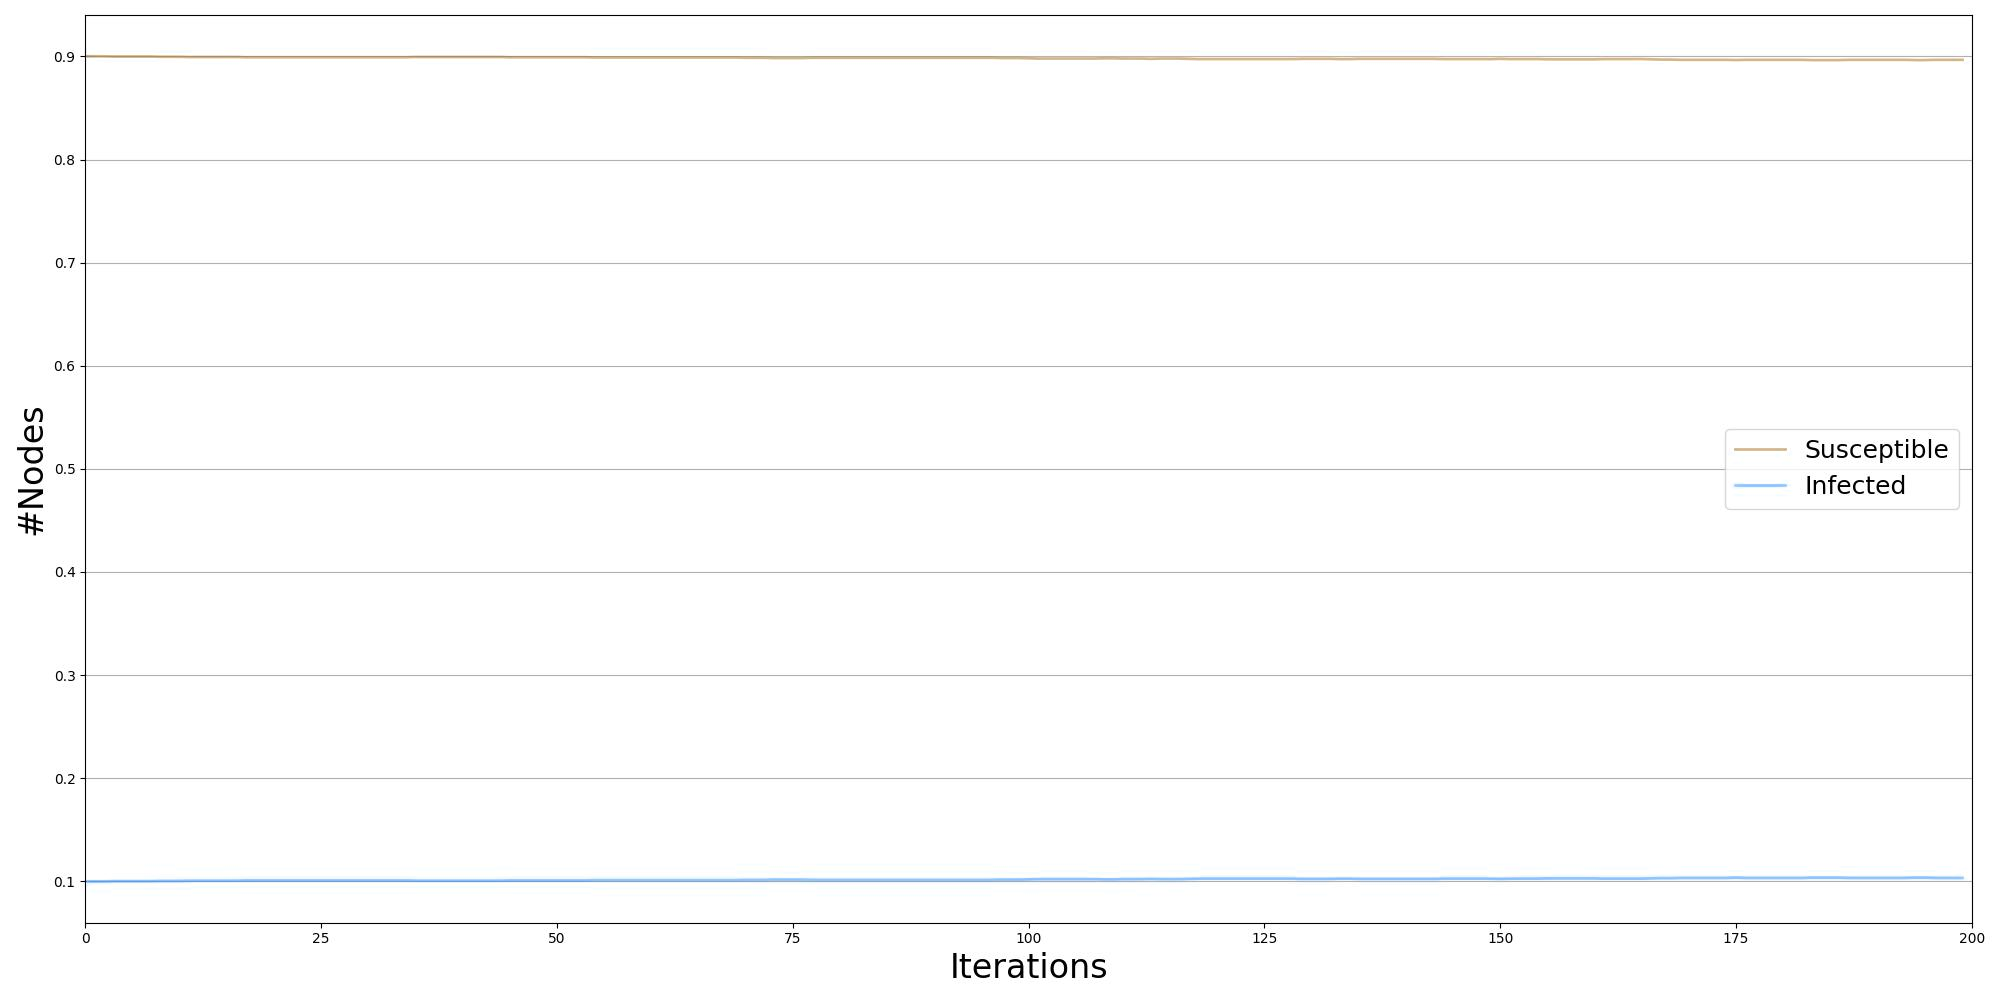

Model: QVoter


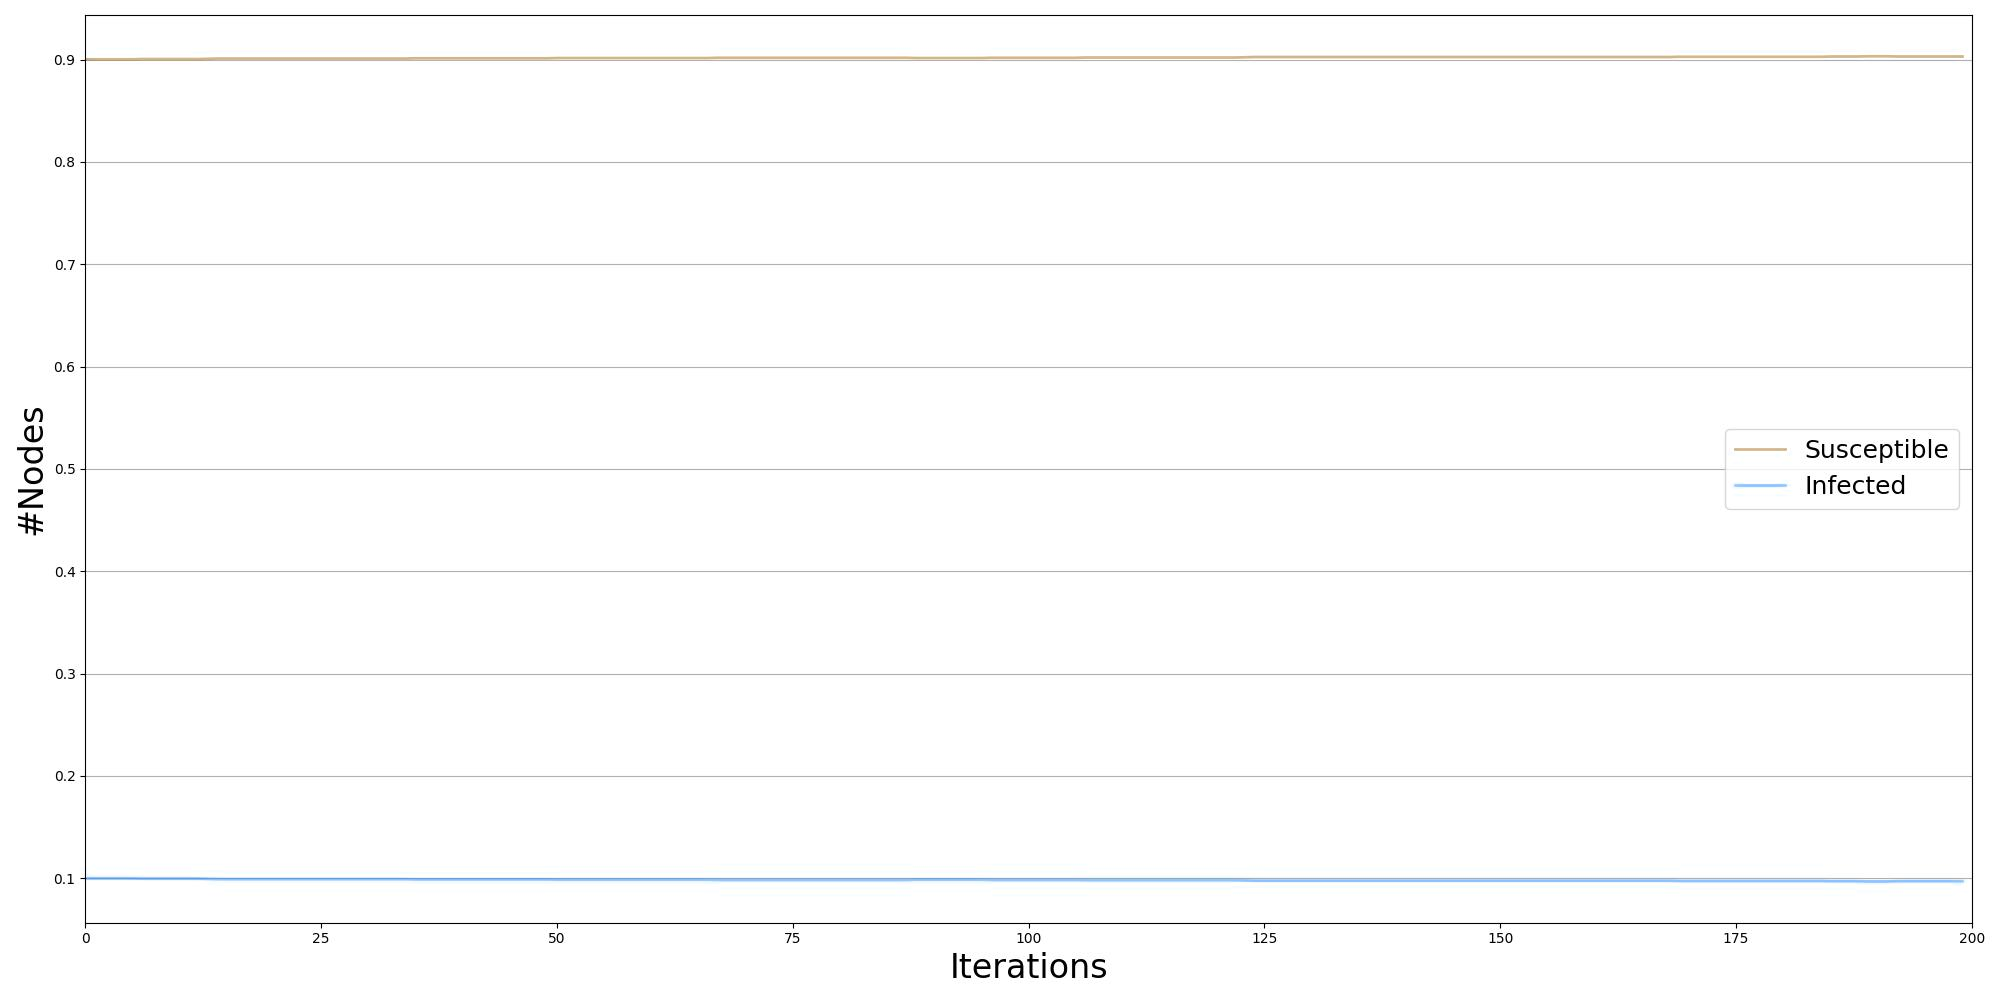

Model: MajorityRuleModel


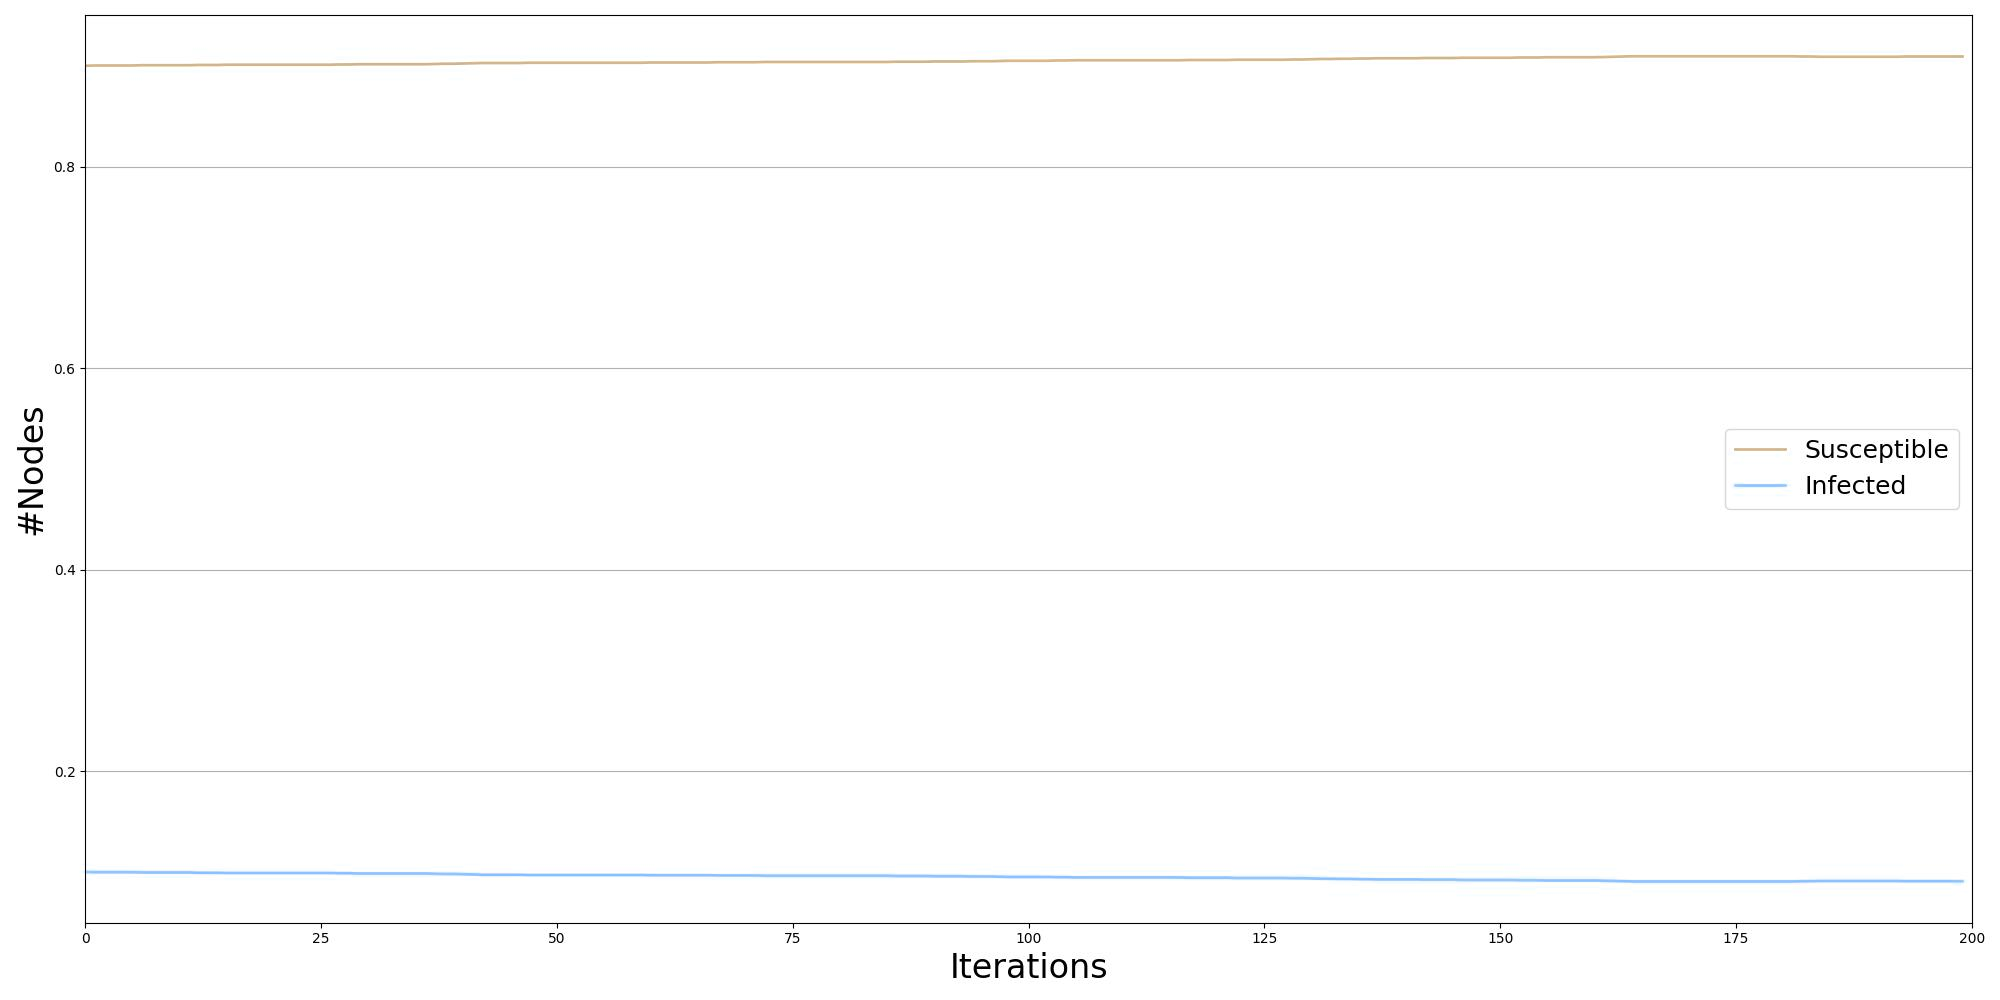

Model: Sznajd


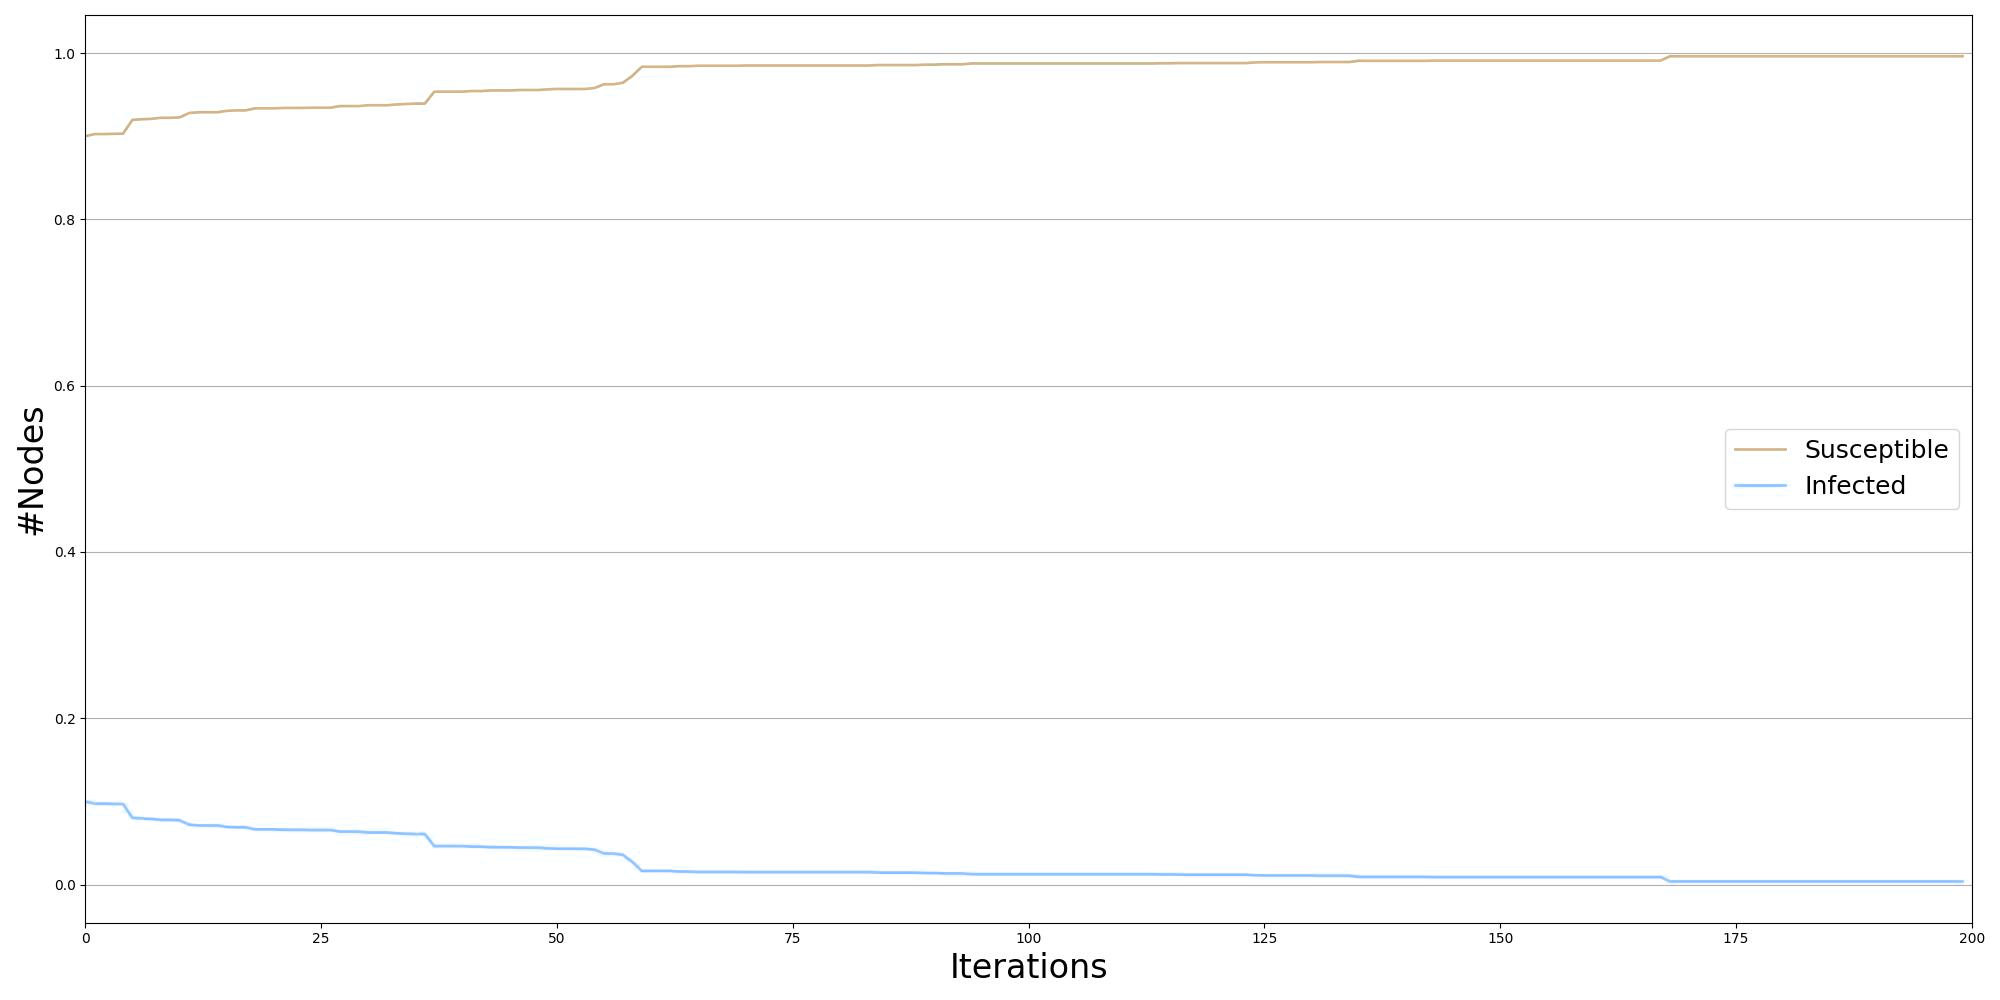

In [156]:
for model_name, image_names in image_names_dict.items():
    print(f"Model: {model_name}")
    for image_name in image_names:
        img = plt.imread(image_name)
        cv2_imshow(img)